#**Customer Segmentation Using Clustering**

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


**Load Dataset**

In [ ]:
df = pd.read_csv("Mall_Customers.csv")  # Replace with correct path
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Basic Info and EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Gender Distribution**

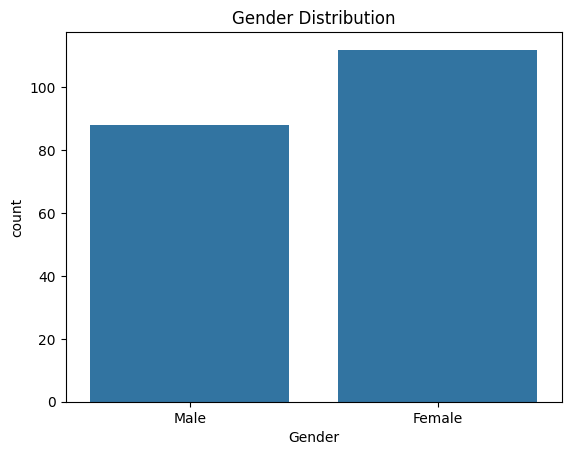

In [ ]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

**Pair Plot**

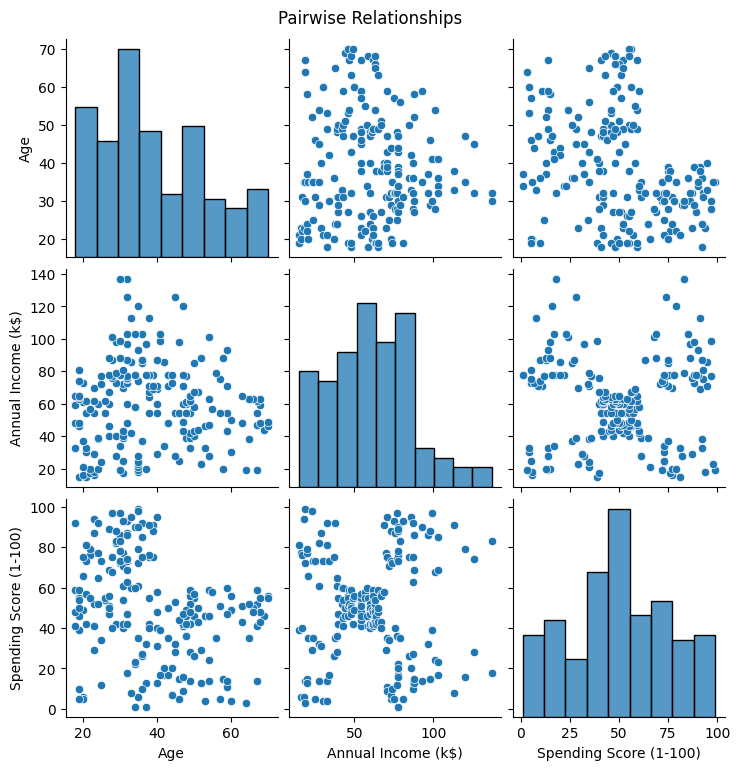

In [ ]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


**Correlation Heatmap**

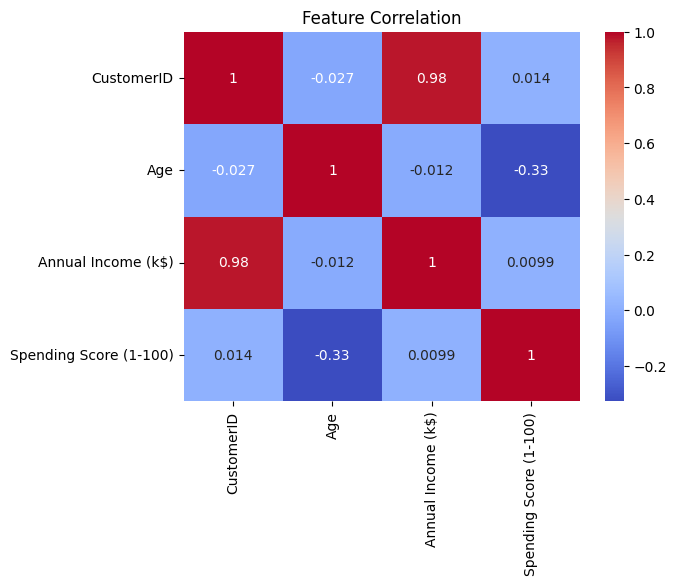

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

**Data Pre-processing**

In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##**K-means Clustering**

**Elbow Method to find optimal K**

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

**Plot**

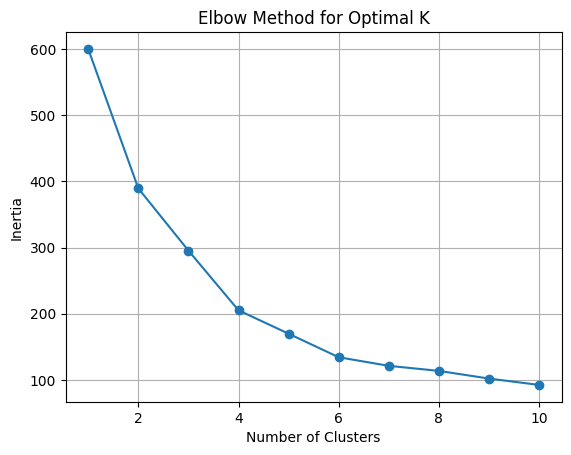

In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Apply KMeans with optimal K (let’s assume 5)**

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans Cluster'] = kmeans_labels

##**Hierarchical Clustering**

**Dendrogram**

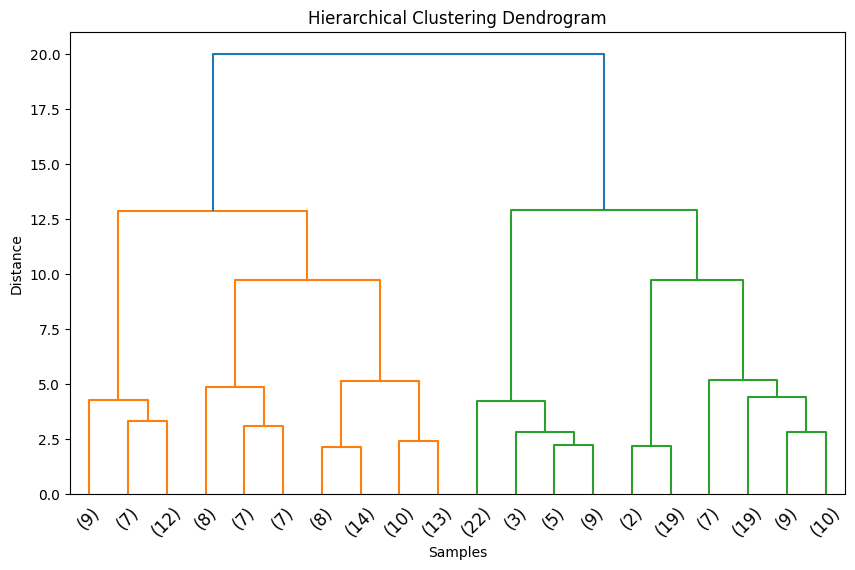

In [ ]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering with 5 clusters
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
df['Hierarchical Cluster'] = agglo_labels

**Apply Agglomerative Clustering with 5 clusters**

In [ ]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X_scaled)
df['Hierarchical Cluster'] = agglo_labels

##**Visualize Clusters**

**KMeans clusters**

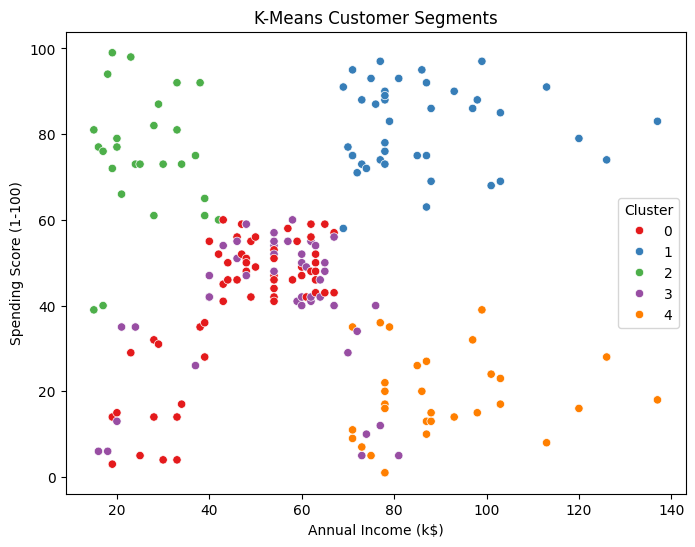

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans Cluster', palette='Set1', data=df)
plt.title('K-Means Customer Segments')
plt.legend(title='Cluster')
plt.show()

**Hierarchical clusters**

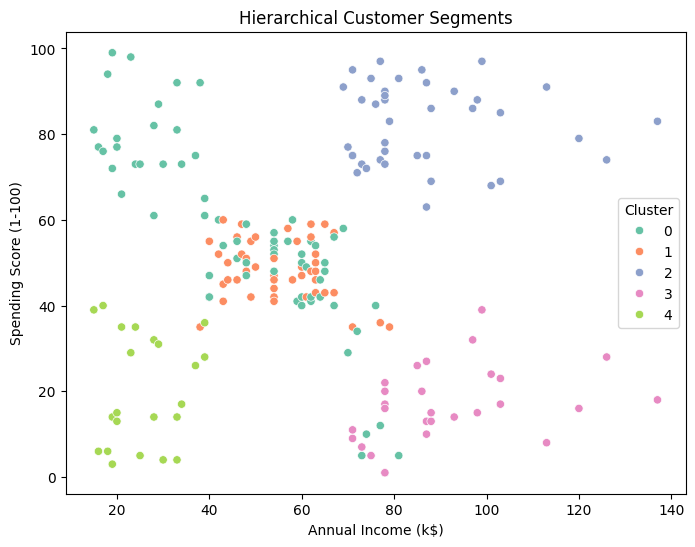

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical Cluster', palette='Set2', data=df)
plt.title('Hierarchical Customer Segments')
plt.legend(title='Cluster')
plt.show()


In [ ]:
print(df.groupby('KMeans Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans Cluster                                                       
0               55.275862           47.620690               41.706897
1               32.875000           86.100000               81.525000
2               25.769231           26.115385               74.846154
3               26.733333           54.311111               40.911111
4               44.387097           89.774194               18.483871
